# Chapter: Regression

* set of features  , 1 response variable to be predicted
* correlation betweeen features and  response variable


* Simple linear regression  ( 1 feature)

$$ \hat{Y} = \beta_0 + \beta_1 * X + \epsilon $$
$X$ predictor, $\hat{Y}$ estimated response, $\beta_0$ intercept , $\beta_1$ slope of $X$, $\epsilon$ statistical error

* Estimating coefficients  is done by minimizing the root mean sum of squares of the regressio
$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (Y_i-(\beta_0 + \beta_1*X_i))^2 }$$

* RMSE has unit and scale

### Accuracy: R-squared

$$SS_{res} = \sum_i (Y_i - \hat{Y}_i)^2$$      
$$SS_{tot} = \sum_i (Y_i - \bar{Y})^2$$
where $\bar{Y}$ is a sample mean response
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

$R^2$ fixes the problem of unit and sacle

$R^2$ close to 1  points to a very good linear fit

#### R commands
R> my_lm  <-lm(sales ~ ads, ata= shop_data)

R> summary(my_lm)

R> my_lm$coefficients

(Intercept)  nose_width 
  27.893058    2.701175 
[1] "predicted nose length: 703.186868647778,757.210373526108"


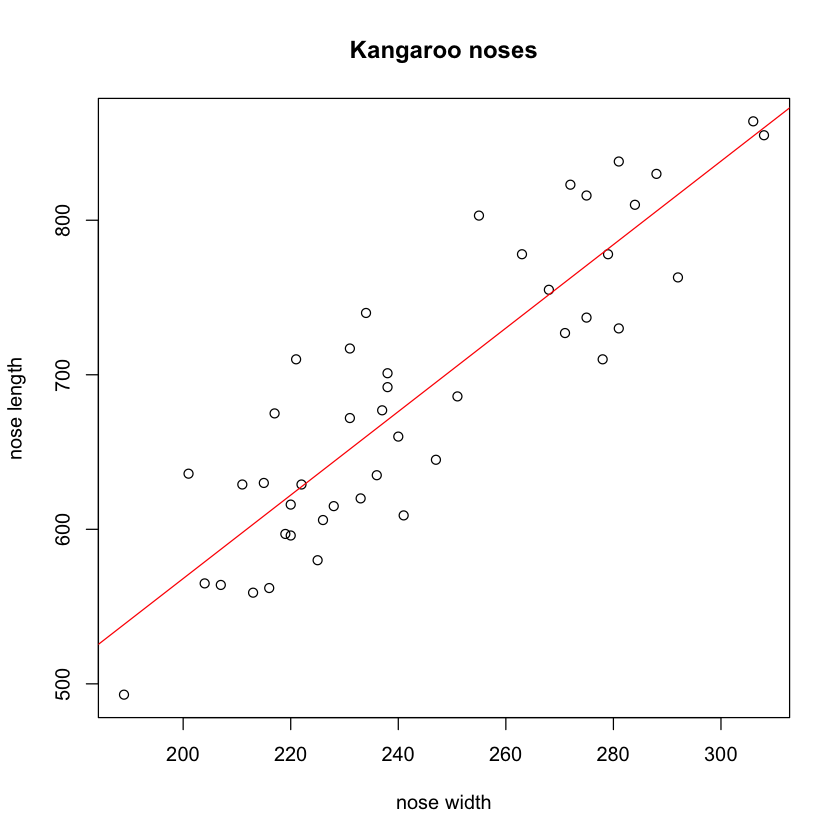

In [31]:
## example with a simple linear regression
# dataset of kangaroo measures of greay kangaroos nose width and length
kang_nose <-read.csv(file="kang_nose.csv", row.names=1, header=T)
#plot the data first
plot(kang_nose, xlab="nose width", ylab="nose length", main="Kangaroo noses")
#make linear regression
lm_kang <- lm(nose_length ~ nose_width, data=kang_nose)
print(lm_kang$coefficients)
abline(lm_kang$coefficients, col="red")
# additional feature values for which we want to know the predictor (nose_lentth)
nose_width_value <- c(250, 270)
# get predicted values
predicted <- predict(lm_kang, data.frame(nose_width=nose_width_value))
print(paste( "predicted nose length:" , paste(predicted, collapse=","))) 



In [32]:
##compaute manually RMSE
nose_length_est <- predict(lm_kang, kang_nose) #predic all (\hat{y})
res <- kang_nose$nose_length - nose_length_est #a vector of residuals
rmse <- sqrt( 1 / nrow(kang_nose) * sum(res^2) )
print(paste("RMSE",rmse))

[1] "RMSE 43.2628802866788"


In [33]:
#compute manually R2
ss_res  <- sum(res^2) #sum of residuals
ss_tot <- sum((kang_nose$nose_length - mean(kang_nose$nose_length))^2) #total sum of squares
r_sq <- 1 - (ss_res)/ss_tot
print(paste("manually compuated R squared", r_sq))
print(summary(lm_kang)) # check with manually computed value

[1] "manually compuated R squared 0.776891408938077"

Call:
lm(formula = nose_length ~ nose_width, data = kang_nose)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.876 -32.912  -4.855  30.227  86.307 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.8931    54.2991   0.514     0.61    
nose_width    2.7012     0.2207  12.236 1.34e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.26 on 43 degrees of freedom
Multiple R-squared:  0.7769,	Adjusted R-squared:  0.7717 
F-statistic: 149.7 on 1 and 43 DF,  p-value: 1.342e-15



[1] "r squared 0.382206714891686"
[1] "afganistan urbanisation 45.0120387342558"


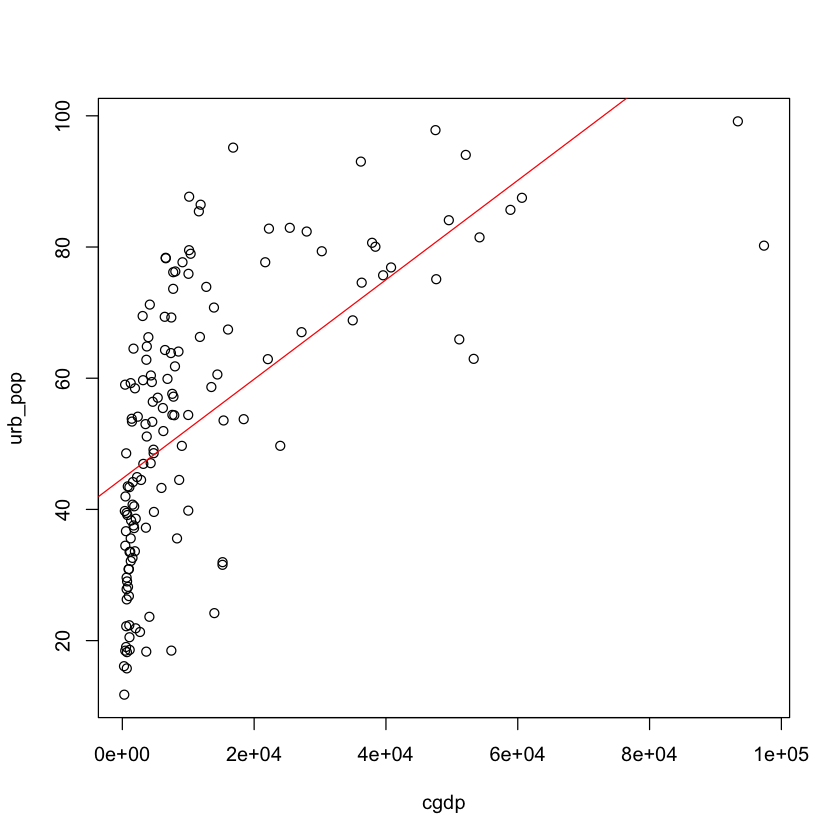

In [34]:
##example with less correlated data 
#rate of urban population vs country gdp
world_bank_train <-read.csv(file="worldbank_urb_gdp.csv", row.names=1, header=T)
plot(world_bank_train)
lm_wb <- lm(urb_pop ~ cgdp, data=world_bank_train)
abline(lm_wb$coefficients, col="red")
print(paste("r squared",summary(lm_wb)$r.squared)) #the r2
print(paste('afganistan urbanisation' , predict(lm_wb, data.frame(cgdp=413))))

[1] "r squared after log transform 0.578758792074867"
[1] "afganistan again 25.8675872630778"


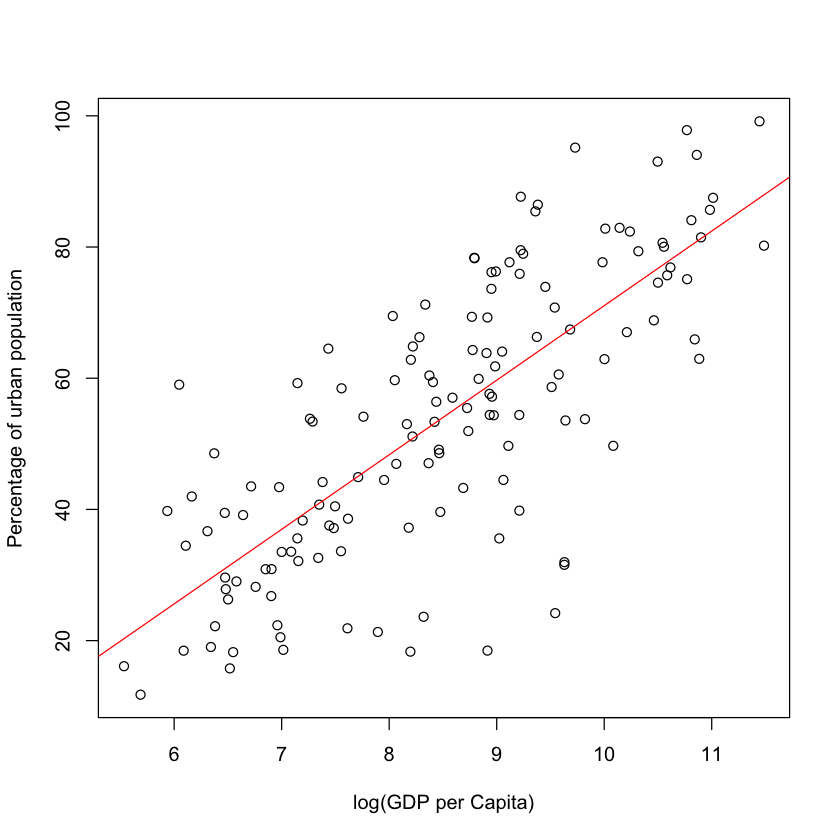

In [35]:
#study if  a log scaling can help
plot(urb_pop ~ log(cgdp), data = world_bank_train, 
     xlab = "log(GDP per Capita)", 
     ylab = "Percentage of urban population")

lm_wb <- lm(urb_pop ~ log(cgdp), data = world_bank_train)
abline(lm_wb$coefficients, col = "red")
print(paste('r squared after log transform',summary(lm_wb)$r.squared))

print(paste('afganistan again' , predict(lm_wb, data.frame(cgdp=413))))

## Multivariable linear regression

* response dependent on a several features
* goal: increase a predictive power

$$\hat{Y} = \beta_0 + \beta_1 * X +..+ \beta_n * X_n  + \epsilon$$

* R> my_lm <- lm(sales ~ ads + comp + .. , data=shop_data)

* check RMSE and Adjusted R-Squared
    * Adjusted R-squared:
        * penalizes more predictor
        * used to compare
* It is recommended to check influence of every predictor in the model
    * look at corresponding p-value in the summary(lm_model)
        * the smaller p-value the more significant is the predictor for the model
        * want 95% confidence p-value <= 0.05 (industry standard)
        * want 99% confidence p-value <= 0.01
#### linear regression assumptions
* observations must be mutually independent
    * to verify plot residuals as a function of fitted values (must not be correlated ) 
        * R\> plot(lm_shop\$fitted.values, lm_shop\$residuals)
* all errors must be equally distributed with a mean value eqaul to zero
    *  to verify  make qqplot of the residuals
        * R\> qqnorm(lm_shop$residuals)
        * this plot compres quantiles of residuals to the quantiles of a normal distribution
        * seek if a linear fit, OK



Call:
lm(formula = sales ~ ., data = shop_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.338  -9.699  -4.496   4.040  41.139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18.85941   30.15023  -0.626 0.538372    
sq_ft        16.20157    3.54444   4.571 0.000166 ***
inv           0.17464    0.05761   3.032 0.006347 ** 
ads          11.52627    2.53210   4.552 0.000174 ***
size_dist    13.58031    1.77046   7.671 1.61e-07 ***
comp         -5.31097    1.70543  -3.114 0.005249 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.65 on 21 degrees of freedom
Multiple R-squared:  0.9932,	Adjusted R-squared:  0.9916 
F-statistic: 611.6 on 5 and 21 DF,  p-value: < 2.2e-16



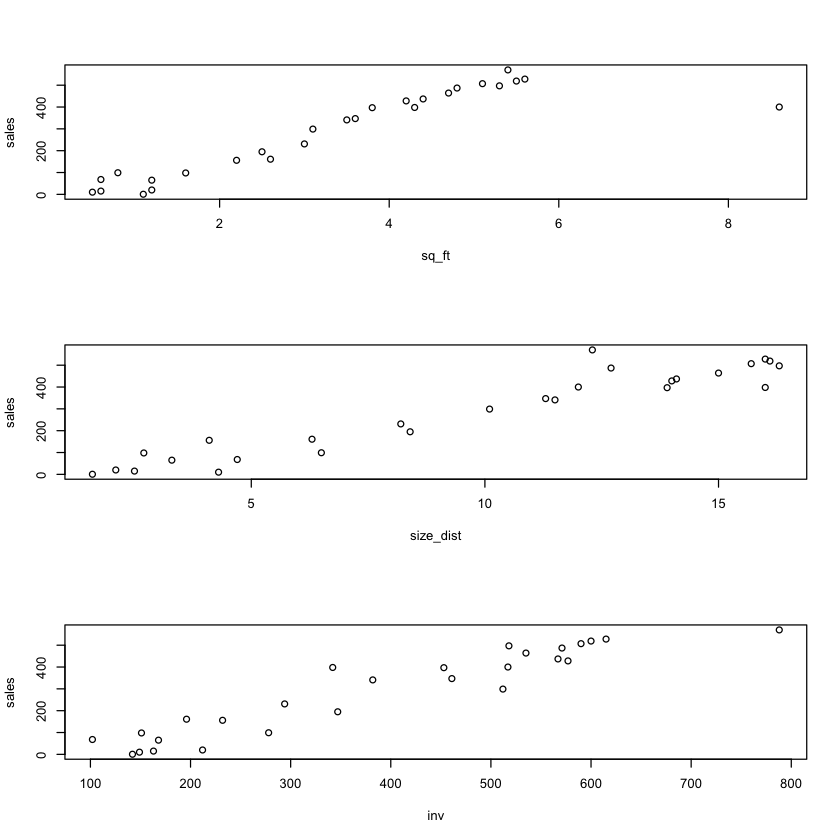

In [36]:
#### mulivariable linear regression
shop_data <- read.csv(file='shop_data.csv', row.names=1, header =T)
#first check the plots of different possible predictors
par(mfrow=c(3,1))
 plot(sales ~ sq_ft, shop_data)
 plot(sales ~ size_dist, shop_data)
 plot(sales ~ inv, shop_data)
par(mfrow=c(1,1))
# make a linear mode with all available features in the dataset
lm_shop <- lm(sales ~ . , data=shop_data)
print(summary(lm_shop)) #observe the high value of R squared
#observe the plot of feature size and its p-value

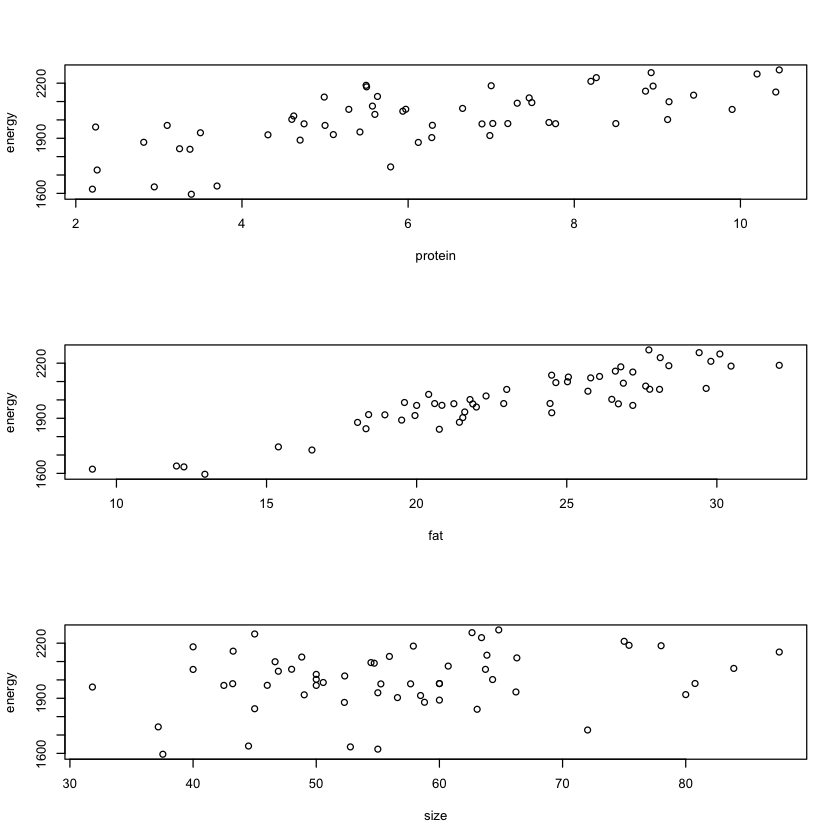

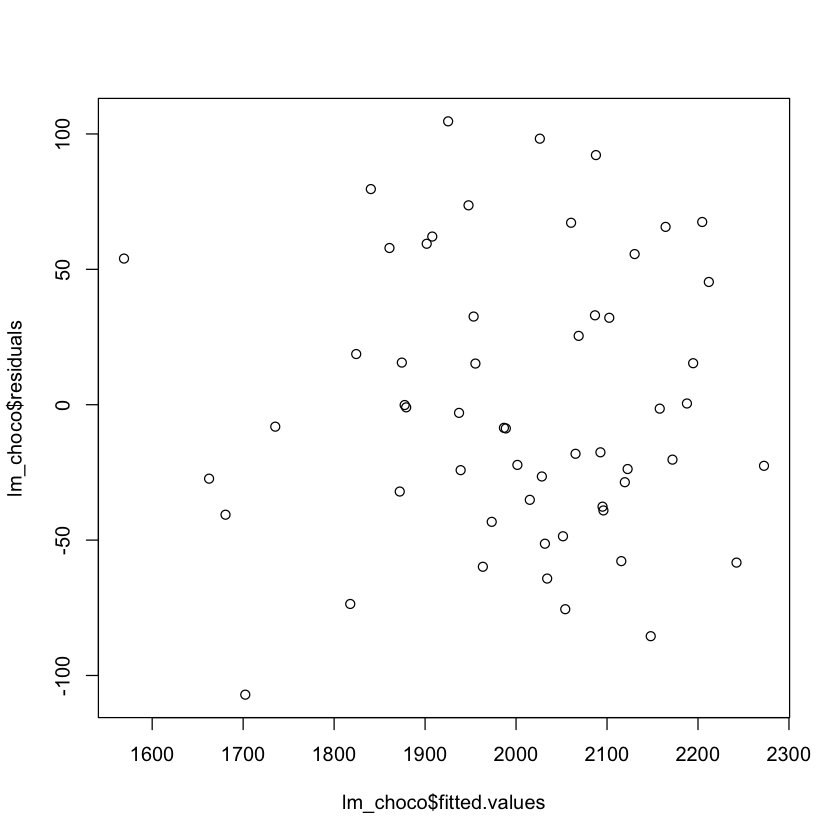


Call:
lm(formula = energy ~ ., data = choco_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-107.084  -35.756   -8.323   36.100  104.660 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1338.3333    40.0928  33.381  < 2e-16 ***
protein       23.0019     3.6636   6.279 6.97e-08 ***
fat           24.4662     1.6885  14.490  < 2e-16 ***
size          -0.8183     0.6035  -1.356    0.181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.2 on 52 degrees of freedom
Multiple R-squared:  0.9019,	Adjusted R-squared:  0.8962 
F-statistic: 159.3 on 3 and 52 DF,  p-value: < 2.2e-16


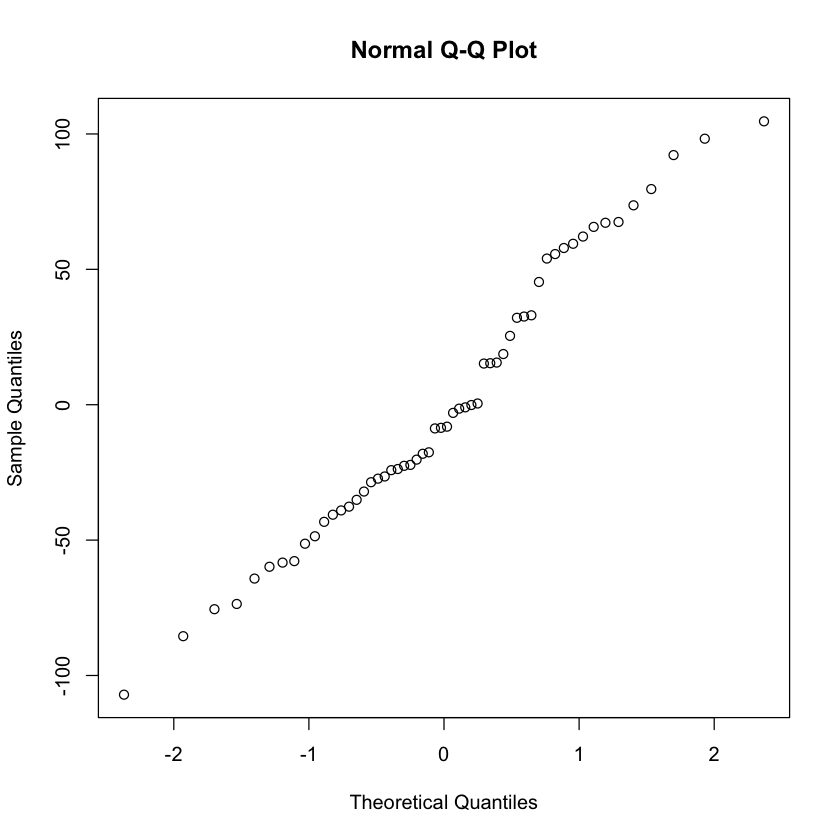

In [37]:
### are all predictors relevant
choco_data <- read.csv(file='choco_data.csv', row.names=1, header =T)
par(mfrow=c(3,1))
plot(energy ~ protein, choco_data)
plot(energy ~ fat, choco_data)
plot(energy ~ size, choco_data)
par(mfrow=c(1,1))
lm_choco <- lm(energy ~ ., data=choco_data)
plot(lm_choco$fitted.values, lm_choco$residuals  ) #residuals, expect uncorrelated
qqnorm(lm_choco$residuals) # expect linear fit
summary(lm_choco)
# size feature is statistically insignificnt (high p-value)

###  Non-Parametric Regression

Problem: visible pattern, but not linear

Solutions: 
 * Transformation (can be tedious)
 * Multi-linear Regression (advanced)
 * non-Parametric Regression (douable)
 
Techniques:
* k-Nearest Neighbors
* Kernel Regression
* Regression Trees
* ..

**No parameter estimations required**

##### k-NN Algorithm
* calculate the distance between new observation and a training set
* determine the most frequent class from k closest neihbors from the training set
* the algo does not make any assumptions on the data ( don't know about relationship between predictors and response )
* if linear relation is preent,  linear regression will predict better than k-nn
* choosing k
    * k=1, perfect fit on trainig set, but poor predictions
    * k=N #obs in training set: mean, also poor predictions  
        => Bias - Variance trade off! 

* Reasonable value: k =20% of #obs in training set


### Generalization in Regression 
* key question how your model is general
* two techniques:
    * hold.out: split the dataset for a random test set and train set
    * k-fold cross-valiation
* Hold out Method for regression
  * (training set) build regr model,  predict the outcome of the test set
  * (training set) calculate the RMSE on training set
  * (test set) calculate the RMSE   on test set
  * compare test RMSE and Training RMSE 
* if two RMSE are comparable , the model generalized well. 
* if two RMSEs are significantly different then it is probably an overfit, underfit

![method](./hold_out_method.png)

### Under and OverFits
![under_over](./under_over_fit.png)

In [38]:

#### comparinng rmse of train and test data to check if the model genealizes well
world_bank_train <- read.csv(file='world_bank_train.csv', row.names=1, header =T)
world_bank_test <- read.csv(file='world_bank_test.csv', row.names=1, header =T)

lm_wb_log <- lm(urb_pop ~ log(cgdp), data = world_bank_train) # log linear model

rmse_train <- sqrt(mean(lm_wb_log$residuals ^ 2)) #rmse training set
#prepare to compute rmse_test
world_bank_test_truth <- world_bank_test$urb_pop
world_bank_test_input <- data.frame(cgdp = world_bank_test$cgdp)
world_bank_test_output <- predict(lm_wb_log, world_bank_test_input)
res_test <- world_bank_test_output - world_bank_test_truth #residuals test

rmse_test <- sqrt(mean(res_test^2)) # explicit formula below
#rmse_test <- sqrt ( 1/nrow(world_bank_test) * sum(res_test^2)  )
# Print the ratio of the test RMSE over the training RMSE
print(paste("rmse ratio test/train", rmse_test/ rmse_train)) 
#value close to 1 => model generalizes well 


[1] "rmse ratio test/train 1.08307986771005"


[1] "rmse linear 17.4189739400454"
[1] "rmse log linear 15.0191102840628"
[1] "rmse knn non parametric 16.1002646183813"


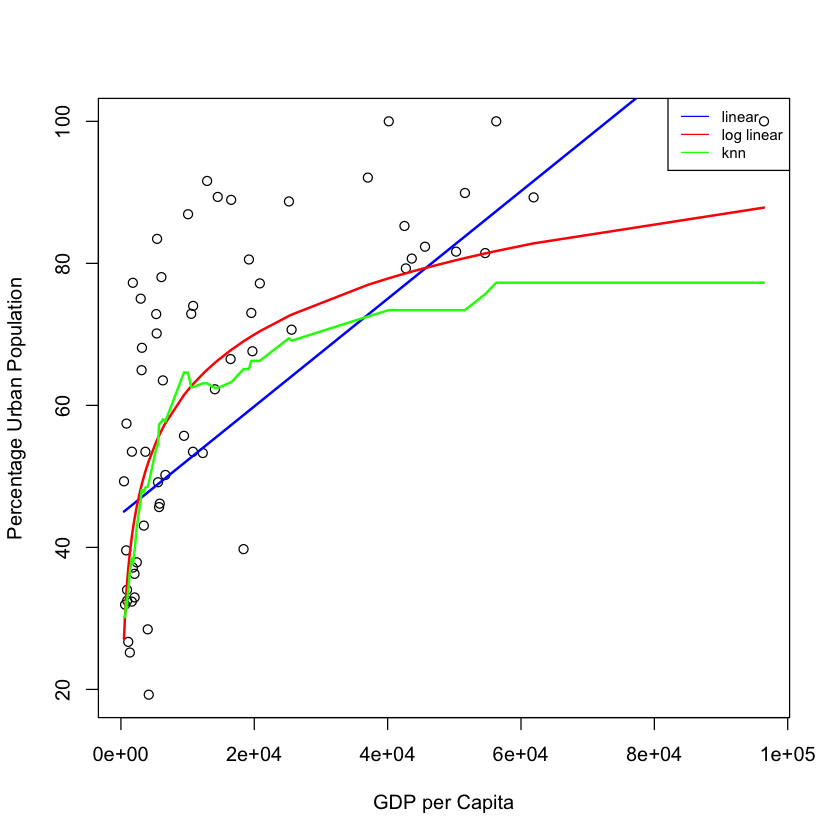

In [39]:

## parametric vs non-parametric
#check Rmse for linear, log linear and knn
lm_wb <- lm(urb_pop ~ cgdp, data = world_bank_train) # log linear model
lm_wb_log <- lm(urb_pop ~ log(cgdp), data = world_bank_train) # log linear model

##define the basic knn algorithm function
my_knn <- function(x_pred, x, y, k){
  m <- length(x_pred)
  predict_knn <- rep(0, m)
  for (i in 1:m) {
    
    # Calculate the absolute distance between x_pred[i] and x
    dist <- abs(x_pred[i] - x)
    
    sort_index <- order(dist)   # ordered vector index  dist[order] will be sorted 
    
    # Apply mean() to the responses of the k-nearest neighbors
    predict_knn[i] <- mean(y[sort_index[1:k]])    
    
  }
  return(predict_knn)
}

ranks <- order(world_bank_test$cgdp) # index for sorint test$cgdp

# Scatter plot of test set
plot(world_bank_test,
     xlab = "GDP per Capita", ylab = "Percentage Urban Population")

# Predict with simple linear model and add line
test_output_lm <- predict(lm_wb, data.frame(cgdp = world_bank_test$cgdp))
lines(world_bank_test$cgdp[ranks], test_output_lm[ranks], lwd = 2, col = "blue")
# Predict with log-linear model and add line
test_output_lm_log <- predict(lm_wb_log, data.frame(cgdp = world_bank_test$cgdp))
lines(world_bank_test$cgdp[ranks], test_output_lm_log[ranks], lwd = 2, col = "red")
# Predict with k-NN and add line
test_output_knn <- my_knn(world_bank_test$cgdp, world_bank_train$cgdp, world_bank_train$urb_pop, 30)
lines(world_bank_test$cgdp[ranks], test_output_knn[ranks], lwd = 2, col = "green")
#add legend
legend('topright', c('linear', 'log linear', 'knn') , 
   lty=1, col=c('blue', 'red', 'green'), bty='y', cex=.75)
#compute rmses for 3 models
rmse_linear<-sqrt(mean( (test_output_lm - world_bank_test$urb_pop) ^ 2))
print(paste("rmse linear",rmse_linear))
rmse_log_linear<-sqrt(mean( (test_output_lm_log - world_bank_test$urb_pop) ^ 2))
print(paste("rmse log linear",rmse_log_linear))
rmse_knn<-sqrt(mean( (test_output_knn - world_bank_test$urb_pop) ^ 2))
print(paste("rmse knn non parametric" ,rmse_knn))